# KHÁM PHÁ VÀ PHÂN TÍCH DỮ LIỆU
## Exploratory Data Analysis (EDA)

---

### Mục tiêu
1. Tải và hiểu cấu trúc dữ liệu
2. Phân tích thống kê mô tả
3. Kiểm tra missing values và outliers
4. Phân tích phân phối các biến
5. Phân tích tương quan giữa các đặc trưng
6. Trực quan hóa mối quan hệ với biến mục tiêu

---

## 1. Import thư viện

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistics
from scipy import stats
from scipy.stats import chi2_contingency

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Import thành công!")

✅ Import thành công!


## 2. Tải dữ liệu

### Hướng dẫn tải dataset:
1. Từ UCI Repository: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
2. Từ Kaggle: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset
3. Đặt file vào thư mục `../data/raw/`

In [ ]:
# Tải dữ liệu
# Thay đổi đường dẫn nếu cần
data_path = '../data/raw/UCI_Credit_Card.csv'

try:
    df = pd.read_csv(data_path)
    print(" Tải dữ liệu thành công!")
    print(f" Kích thước dữ liệu: {df.shape[0]:,} hàng x {df.shape[1]} cột")
except FileNotFoundError:
    print("Không tìm thấy file dữ liệu!")
    print("Vui lòng tải dataset và đặt vào thư mục ../data/raw/")
    print("Link tải: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset")

✅ Tải dữ liệu thành công!
📊 Kích thước dữ liệu: 30,000 hàng x 25 cột


In [3]:
# Hiển thị 5 dòng đầu tiên
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

In [4]:
# Thông tin cấu trúc dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## 3. Thống kê mô tả cơ bản

In [5]:
# Thống kê các biến số
df.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default.payment.next.month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default.payment.next.month      0.00       0.0       0.00        1.0

In [ ]:
# Kiểm tra missing values
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percent
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Percentage', ascending=False)

if len(missing_df) > 0:
    print(" Có dữ liệu thiếu:")
    print(missing_df)
else:
    print(" Không có dữ liệu thiếu!")

✅ Không có dữ liệu thiếu!


In [7]:
# Kiểm tra duplicate rows
duplicates = df.duplicated().sum()
print(f"Số dòng trùng lặp: {duplicates}")

if duplicates > 0:
    print(f"⚠️ Tỷ lệ trùng lặp: {duplicates/len(df)*100:.2f}%")

Số dòng trùng lặp: 0


## 4. Phân tích biến mục tiêu (Target Variable)

Biến mục tiêu là `default.payment.next.month`:
- 1: Khách hàng vỡ nợ
- 0: Khách hàng không vỡ nợ

In [8]:
# Đổi tên cột target cho dễ làm việc
if 'default.payment.next.month' in df.columns:
    df.rename(columns={'default.payment.next.month': 'default'}, inplace=True)

# Phân phối target
target_counts = df['default'].value_counts()
target_percent = df['default'].value_counts(normalize=True) * 100

print("📊 Phân phối biến mục tiêu:")
print(f"\nKhông vỡ nợ (0): {target_counts[0]:,} ({target_percent[0]:.2f}%)")
print(f"Vỡ nợ (1): {target_counts[1]:,} ({target_percent[1]:.2f}%)")
print(f"\n⚠️ Tỷ lệ imbalance: {target_counts[0]/target_counts[1]:.2f}:1")

📊 Phân phối biến mục tiêu:

Không vỡ nợ (0): 23,364 (77.88%)
Vỡ nợ (1): 6,636 (22.12%)

⚠️ Tỷ lệ imbalance: 3.52:1


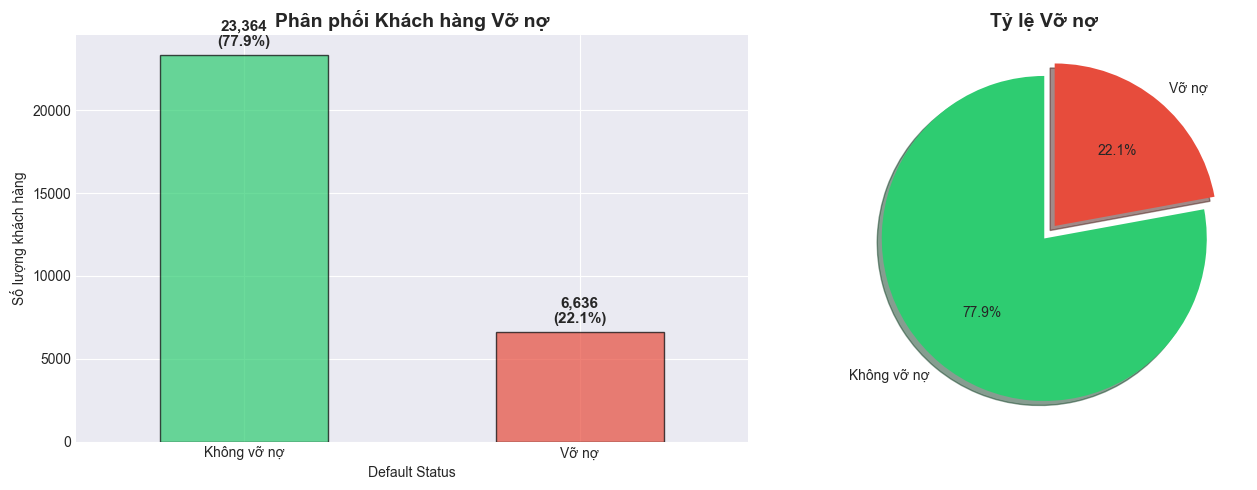

In [9]:
# Trực quan hóa target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
colors = ['#2ecc71', '#e74c3c']
target_counts.plot(kind='bar', ax=axes[0], color=colors, edgecolor='black', alpha=0.7)
axes[0].set_title('Phân phối Khách hàng Vỡ nợ', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Default Status')
axes[0].set_ylabel('Số lượng khách hàng')
axes[0].set_xticklabels(['Không vỡ nợ', 'Vỡ nợ'], rotation=0)

# Add value labels
for i, v in enumerate(target_counts):
    axes[0].text(i, v + 500, f'{v:,}\n({target_percent[i]:.1f}%)', 
                ha='center', fontsize=11, fontweight='bold')

# Pie chart
axes[1].pie(target_counts, labels=['Không vỡ nợ', 'Vỡ nợ'], 
           autopct='%1.1f%%', colors=colors, startangle=90,
           explode=(0, 0.1), shadow=True)
axes[1].set_title('Tỷ lệ Vỡ nợ', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Phân tích các biến nhân khẩu học

In [10]:
# 5.1. Phân tích GIỚI TÍNH (SEX)
print("=" * 50)
print("PHÂN TÍCH THEO GIỚI TÍNH")
print("=" * 50)

sex_mapping = {1: 'Nam', 2: 'Nữ'}
df['SEX_label'] = df['SEX'].map(sex_mapping)

# Cross-tabulation
sex_default = pd.crosstab(df['SEX_label'], df['default'], normalize='index') * 100
print("\nTỷ lệ vỡ nợ theo giới tính (%):\n")
print(sex_default)

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(df['SEX'], df['default']))
print(f"\nChi-square test: p-value = {p_value:.6f}")
if p_value < 0.05:
    print("✅ Có sự khác biệt có ý nghĩa thống kê")
else:
    print("❌ Không có sự khác biệt có ý nghĩa thống kê")

PHÂN TÍCH THEO GIỚI TÍNH

Tỷ lệ vỡ nợ theo giới tính (%):

default            0          1
SEX_label                      
Nam        75.832773  24.167227
Nữ         79.223719  20.776281

Chi-square test: p-value = 0.000000
✅ Có sự khác biệt có ý nghĩa thống kê


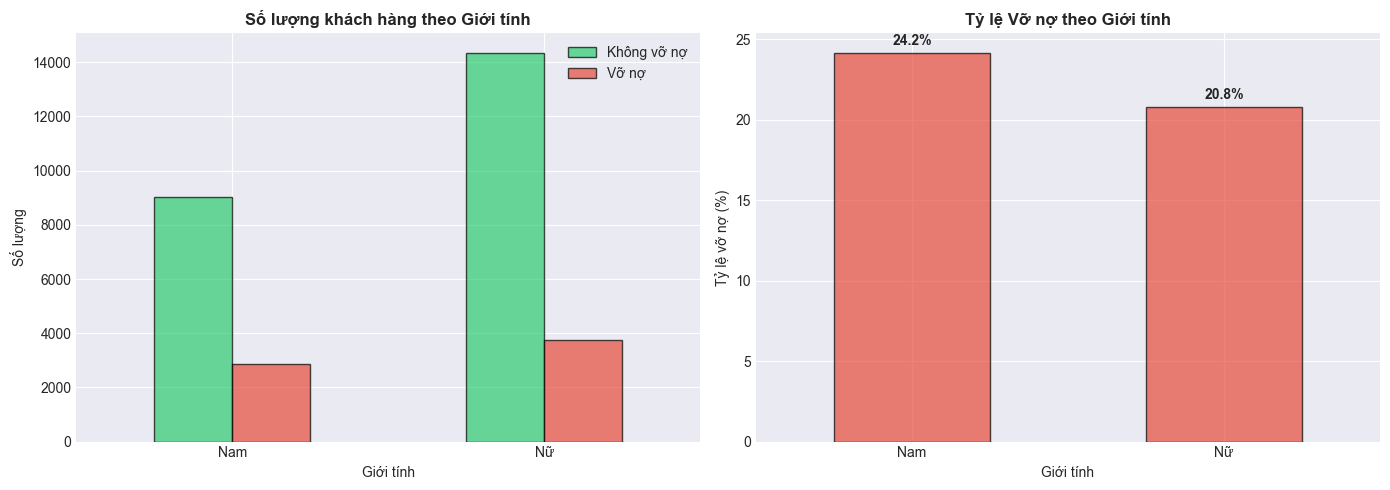

In [11]:
# Visualization - Gender
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sex_counts = df.groupby(['SEX_label', 'default']).size().unstack()
sex_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], 
               edgecolor='black', alpha=0.7)
axes[0].set_title('Số lượng khách hàng theo Giới tính', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Giới tính')
axes[0].set_ylabel('Số lượng')
axes[0].legend(['Không vỡ nợ', 'Vỡ nợ'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Default rate
sex_default[1].plot(kind='bar', ax=axes[1], color='#e74c3c', 
                    edgecolor='black', alpha=0.7)
axes[1].set_title('Tỷ lệ Vỡ nợ theo Giới tính', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Giới tính')
axes[1].set_ylabel('Tỷ lệ vỡ nợ (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

# Add value labels
for i, v in enumerate(sex_default[1]):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/gender_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# 5.2. Phân tích TRÌNH ĐỘ HỌC VẤN (EDUCATION)
print("=" * 50)
print("PHÂN TÍCH THEO TRÌNH ĐỘ HỌC VẤN")
print("=" * 50)

education_mapping = {
    1: 'Cao học',
    2: 'Đại học',
    3: 'THPT',
    4: 'Khác',
    5: 'Không rõ',
    6: 'Không rõ',
    0: 'Không rõ'
}
df['EDUCATION_label'] = df['EDUCATION'].map(education_mapping)

# Cross-tabulation
edu_default = pd.crosstab(df['EDUCATION_label'], df['default'], normalize='index') * 100
edu_default = edu_default.loc[['Cao học', 'Đại học', 'THPT', 'Khác']]
print("\nTỷ lệ vỡ nợ theo trình độ học vấn (%):\n")
print(edu_default)

PHÂN TÍCH THEO TRÌNH ĐỘ HỌC VẤN

Tỷ lệ vỡ nợ theo trình độ học vấn (%):

default                  0          1
EDUCATION_label                      
Cao học          80.765234  19.234766
Đại học          76.265146  23.734854
THPT             74.842384  25.157616
Khác             94.308943   5.691057


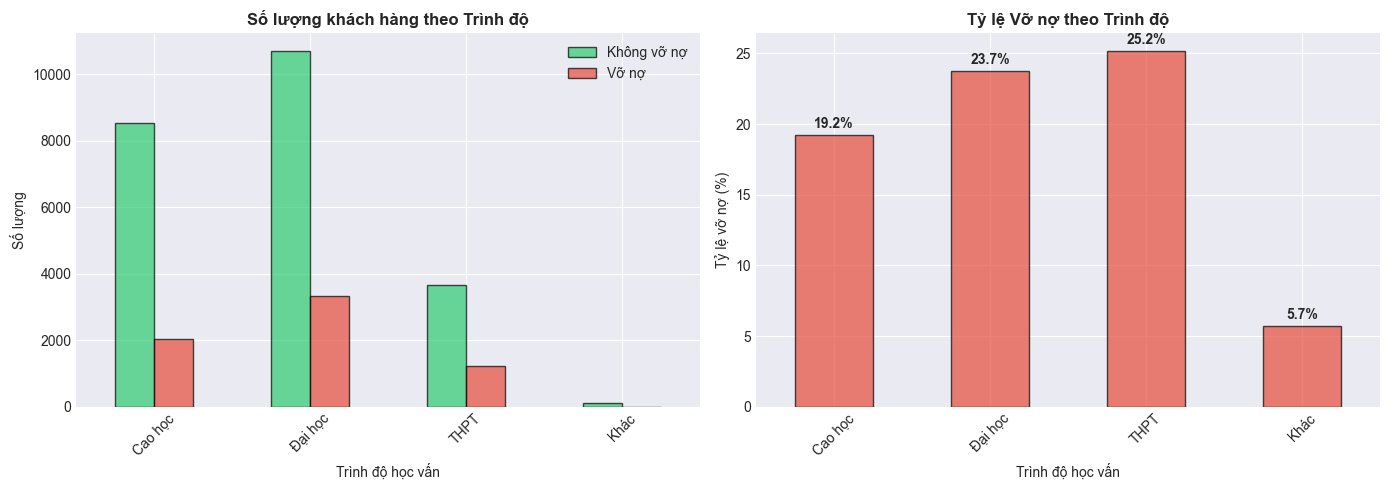

In [13]:
# Visualization - Education
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
edu_counts = df[df['EDUCATION_label'].isin(['Cao học', 'Đại học', 'THPT', 'Khác'])].groupby(['EDUCATION_label', 'default']).size().unstack()
edu_counts = edu_counts.loc[['Cao học', 'Đại học', 'THPT', 'Khác']]
edu_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], 
               edgecolor='black', alpha=0.7)
axes[0].set_title('Số lượng khách hàng theo Trình độ', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Trình độ học vấn')
axes[0].set_ylabel('Số lượng')
axes[0].legend(['Không vỡ nợ', 'Vỡ nợ'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Default rate
edu_default[1].plot(kind='bar', ax=axes[1], color='#e74c3c', 
                    edgecolor='black', alpha=0.7)
axes[1].set_title('Tỷ lệ Vỡ nợ theo Trình độ', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Trình độ học vấn')
axes[1].set_ylabel('Tỷ lệ vỡ nợ (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

for i, v in enumerate(edu_default[1]):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/education_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# 5.3. Phân tích TÌNH TRẠNG HÔN NHÂN (MARRIAGE)
print("=" * 50)
print("PHÂN TÍCH THEO TÌNH TRẠNG HÔN NHÂN")
print("=" * 50)

marriage_mapping = {
    1: 'Đã kết hôn',
    2: 'Độc thân',
    3: 'Khác',
    0: 'Không rõ'
}
df['MARRIAGE_label'] = df['MARRIAGE'].map(marriage_mapping)

# Cross-tabulation
marriage_default = pd.crosstab(df['MARRIAGE_label'], df['default'], normalize='index') * 100
marriage_default = marriage_default.loc[['Đã kết hôn', 'Độc thân', 'Khác']]
print("\nTỷ lệ vỡ nợ theo tình trạng hôn nhân (%):\n")
print(marriage_default)

PHÂN TÍCH THEO TÌNH TRẠNG HÔN NHÂN

Tỷ lệ vỡ nợ theo tình trạng hôn nhân (%):

default                 0          1
MARRIAGE_label                      
Đã kết hôn      76.528296  23.471704
Độc thân        79.071661  20.928339
Khác            73.993808  26.006192


In [15]:
# 5.4. Phân tích ĐỘ TUỔI (AGE)
print("=" * 50)
print("PHÂN TÍCH THEO ĐỘ TUỔI")
print("=" * 50)

# Statistics
print("\nThống kê độ tuổi:")
print(df['AGE'].describe())

# By default status
print("\nĐộ tuổi theo trạng thái vỡ nợ:")
print(df.groupby('default')['AGE'].describe())

# T-test
age_no_default = df[df['default'] == 0]['AGE']
age_default = df[df['default'] == 1]['AGE']
t_stat, p_value = stats.ttest_ind(age_no_default, age_default)
print(f"\nT-test: p-value = {p_value:.6f}")
if p_value < 0.05:
    print("✅ Có sự khác biệt có ý nghĩa thống kê về độ tuổi")
else:
    print("❌ Không có sự khác biệt có ý nghĩa thống kê về độ tuổi")

PHÂN TÍCH THEO ĐỘ TUỔI

Thống kê độ tuổi:
count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Độ tuổi theo trạng thái vỡ nợ:
           count       mean       std   min   25%   50%   75%   max
default                                                            
0        23364.0  35.417266  9.077355  21.0  28.0  34.0  41.0  79.0
1         6636.0  35.725738  9.693438  21.0  28.0  34.0  42.0  75.0

T-test: p-value = 0.016137
✅ Có sự khác biệt có ý nghĩa thống kê về độ tuổi


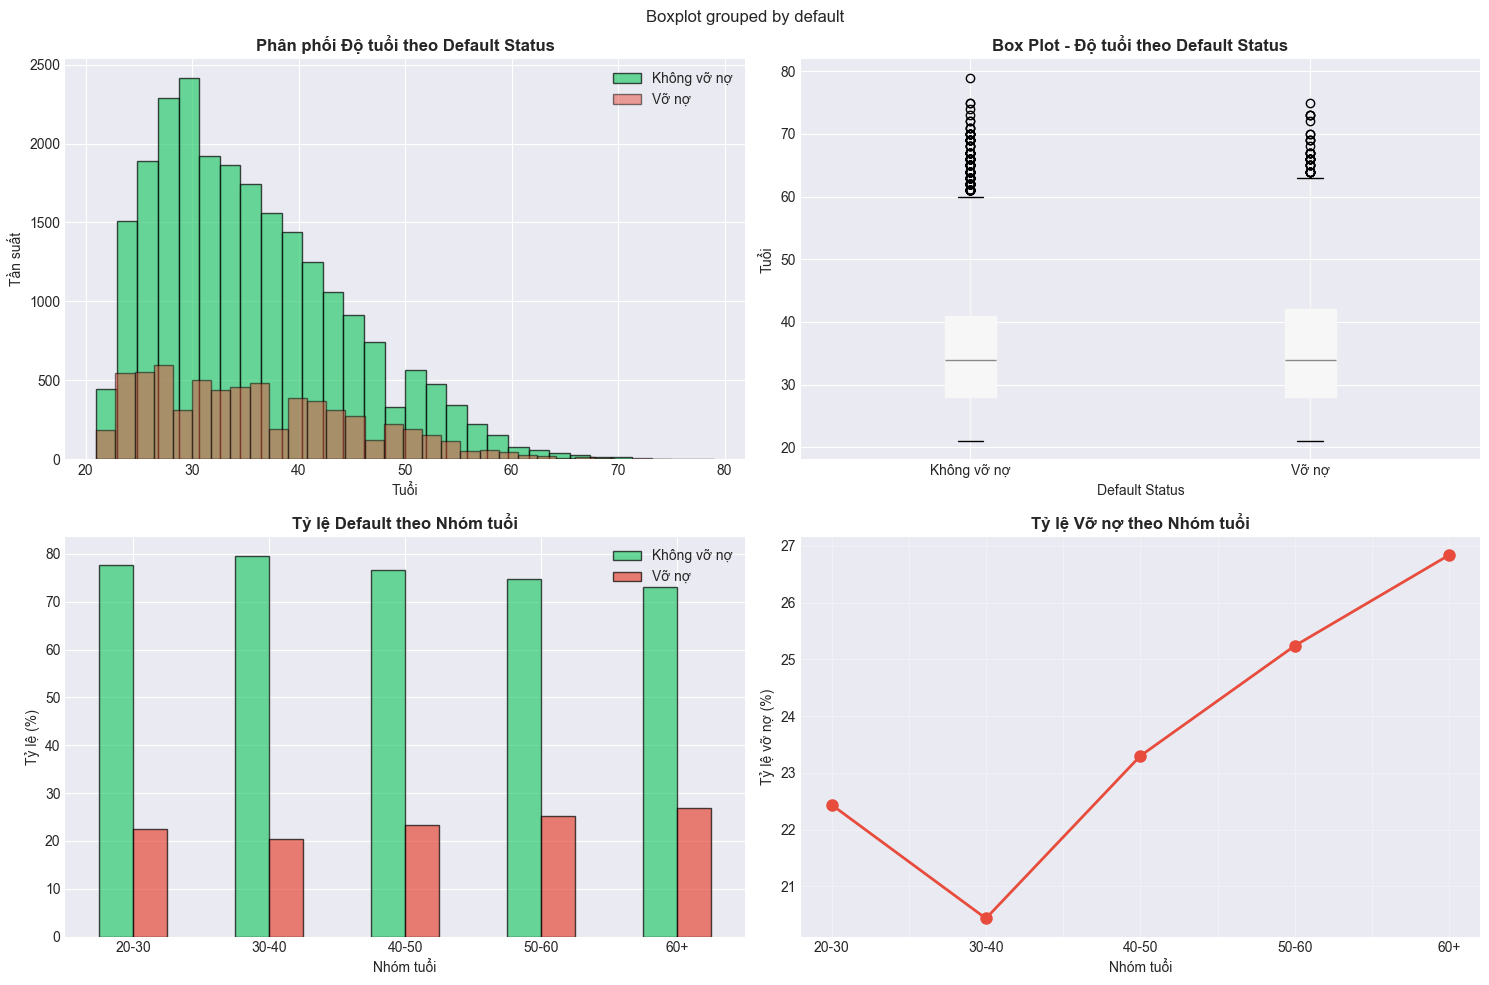

In [16]:
# Visualization - Age
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution by default
df[df['default'] == 0]['AGE'].hist(bins=30, ax=axes[0, 0], color='#2ecc71', 
                                    edgecolor='black', alpha=0.7, label='Không vỡ nợ')
df[df['default'] == 1]['AGE'].hist(bins=30, ax=axes[0, 0], color='#e74c3c', 
                                    edgecolor='black', alpha=0.5, label='Vỡ nợ')
axes[0, 0].set_title('Phân phối Độ tuổi theo Default Status', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Tuổi')
axes[0, 0].set_ylabel('Tần suất')
axes[0, 0].legend()

# Box plot
df.boxplot(column='AGE', by='default', ax=axes[0, 1], patch_artist=True)
axes[0, 1].set_title('Box Plot - Độ tuổi theo Default Status', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Default Status')
axes[0, 1].set_ylabel('Tuổi')
axes[0, 1].set_xticklabels(['Không vỡ nợ', 'Vỡ nợ'])

# Age groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 80], 
                         labels=['20-30', '30-40', '40-50', '50-60', '60+'])
age_group_default = pd.crosstab(df['AGE_GROUP'], df['default'], normalize='index') * 100

age_group_default.plot(kind='bar', ax=axes[1, 0], color=['#2ecc71', '#e74c3c'],
                       edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Tỷ lệ Default theo Nhóm tuổi', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Nhóm tuổi')
axes[1, 0].set_ylabel('Tỷ lệ (%)')
axes[1, 0].legend(['Không vỡ nợ', 'Vỡ nợ'])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Default rate by age group
age_group_default[1].plot(kind='line', ax=axes[1, 1], color='#e74c3c', 
                         marker='o', linewidth=2, markersize=8)
axes[1, 1].set_title('Tỷ lệ Vỡ nợ theo Nhóm tuổi', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Nhóm tuổi')
axes[1, 1].set_ylabel('Tỷ lệ vỡ nợ (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/age_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Phân tích Hạn mức Tín dụng (LIMIT_BAL)

In [17]:
print("=" * 50)
print("PHÂN TÍCH HẠN MỨC TÍN DỤNG")
print("=" * 50)

# Statistics
print("\nThống kê hạn mức tín dụng (NT$):")
print(df['LIMIT_BAL'].describe())

# By default status
print("\nHạn mức theo trạng thái vỡ nợ (NT$):")
print(df.groupby('default')['LIMIT_BAL'].describe())

# T-test
limit_no_default = df[df['default'] == 0]['LIMIT_BAL']
limit_default = df[df['default'] == 1]['LIMIT_BAL']
t_stat, p_value = stats.ttest_ind(limit_no_default, limit_default)
print(f"\nT-test: p-value = {p_value:.10f}")
if p_value < 0.05:
    print("✅ Có sự khác biệt có ý nghĩa thống kê về hạn mức")
    print(f"Hạn mức trung bình - Không vỡ nợ: NT$ {limit_no_default.mean():,.0f}")
    print(f"Hạn mức trung bình - Vỡ nợ: NT$ {limit_default.mean():,.0f}")
else:
    print("❌ Không có sự khác biệt có ý nghĩa thống kê về hạn mức")

PHÂN TÍCH HẠN MỨC TÍN DỤNG

Thống kê hạn mức tín dụng (NT$):
count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Hạn mức theo trạng thái vỡ nợ (NT$):
           count           mean            std      min      25%       50%  \
default                                                                      
0        23364.0  178099.726074  131628.359660  10000.0  70000.0  150000.0   
1         6636.0  130109.656420  115378.540571  10000.0  50000.0   90000.0   

              75%        max  
default                       
0        250000.0  1000000.0  
1        200000.0   740000.0  

T-test: p-value = 0.0000000000
✅ Có sự khác biệt có ý nghĩa thống kê về hạn mức
Hạn mức trung bình - Không vỡ nợ: NT$ 178,100
Hạn mức trung bình - Vỡ nợ: NT$ 130,110


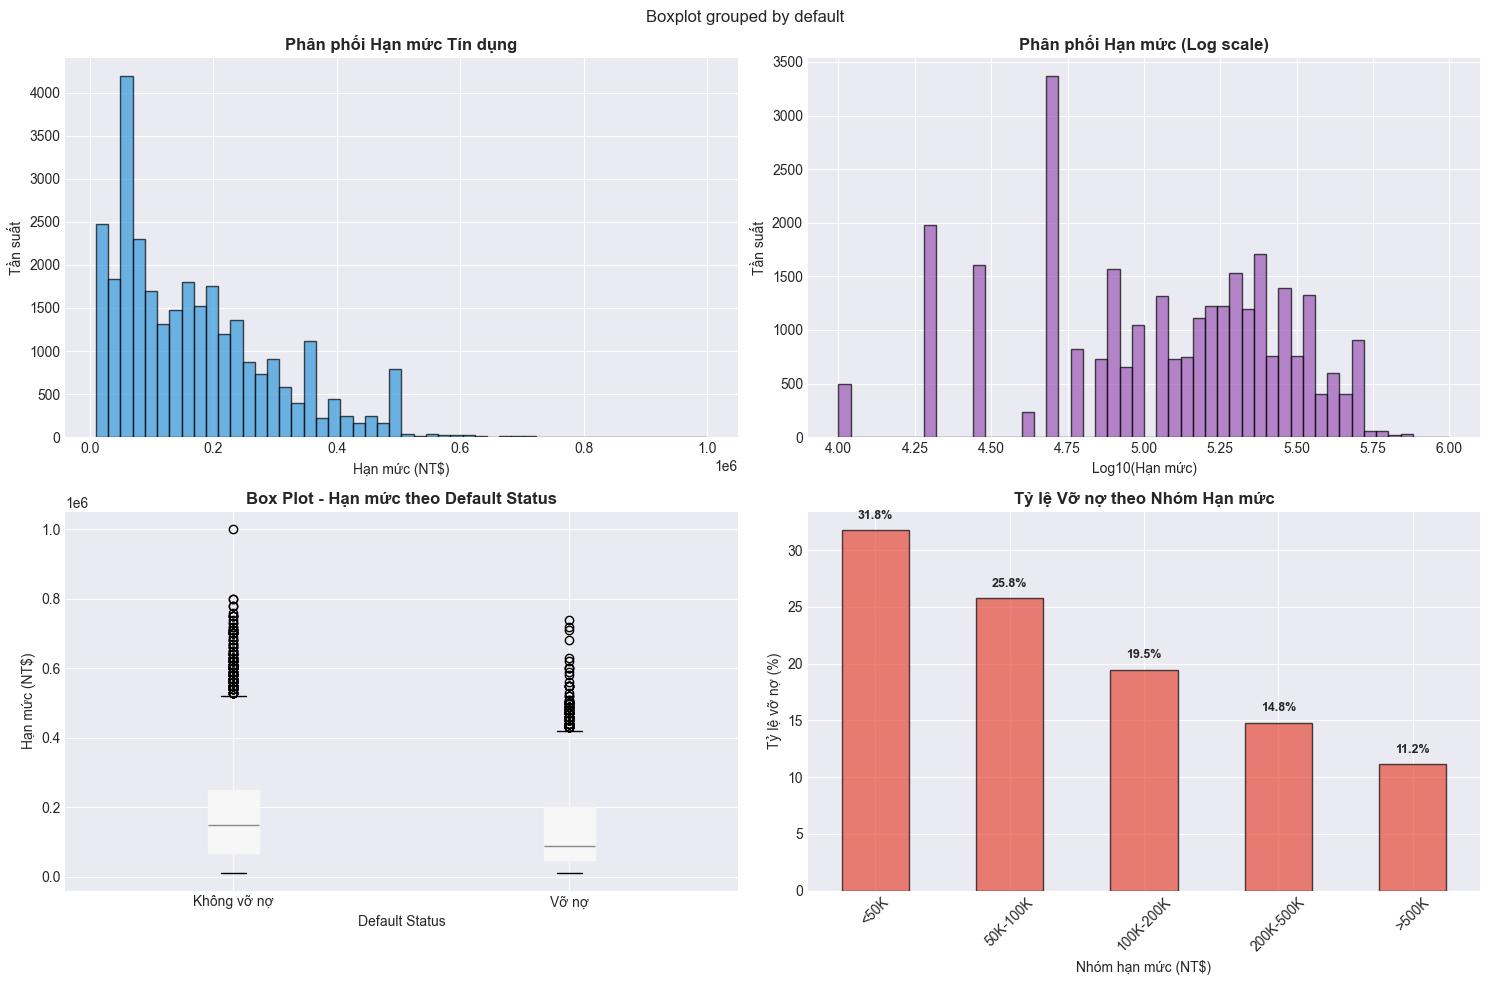

In [18]:
# Visualization - Credit Limit
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution
axes[0, 0].hist(df['LIMIT_BAL'], bins=50, edgecolor='black', alpha=0.7, color='#3498db')
axes[0, 0].set_title('Phân phối Hạn mức Tín dụng', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Hạn mức (NT$)')
axes[0, 0].set_ylabel('Tần suất')

# Log scale
axes[0, 1].hist(np.log10(df['LIMIT_BAL']+1), bins=50, edgecolor='black', alpha=0.7, color='#9b59b6')
axes[0, 1].set_title('Phân phối Hạn mức (Log scale)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Log10(Hạn mức)')
axes[0, 1].set_ylabel('Tần suất')

# By default status
df.boxplot(column='LIMIT_BAL', by='default', ax=axes[1, 0], patch_artist=True)
axes[1, 0].set_title('Box Plot - Hạn mức theo Default Status', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Default Status')
axes[1, 0].set_ylabel('Hạn mức (NT$)')
axes[1, 0].set_xticklabels(['Không vỡ nợ', 'Vỡ nợ'])

# Limit groups
df['LIMIT_GROUP'] = pd.cut(df['LIMIT_BAL'], bins=[0, 50000, 100000, 200000, 500000, 1000000], 
                           labels=['<50K', '50K-100K', '100K-200K', '200K-500K', '>500K'])
limit_group_default = pd.crosstab(df['LIMIT_GROUP'], df['default'], normalize='index') * 100

limit_group_default[1].plot(kind='bar', ax=axes[1, 1], color='#e74c3c',
                           edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Tỷ lệ Vỡ nợ theo Nhóm Hạn mức', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Nhóm hạn mức (NT$)')
axes[1, 1].set_ylabel('Tỷ lệ vỡ nợ (%)')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

for i, v in enumerate(limit_group_default[1]):
    axes[1, 1].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/credit_limit_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Phân tích Lịch sử Thanh toán (PAY_0 to PAY_6)

In [19]:
print("=" * 50)
print("PHÂN TÍCH LỊCH SỬ THANH TOÁN")
print("=" * 50)

# Payment status columns
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

print("\nThống kê trạng thái thanh toán:")
print(df[pay_cols].describe())

# Value counts for PAY_0 (most recent)
print("\nPhân phối trạng thái thanh toán tháng gần nhất (PAY_0):")
print(df['PAY_0'].value_counts().sort_index())

PHÂN TÍCH LỊCH SỬ THANH TOÁN

Thống kê trạng thái thanh toán:
              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6  
count  30000.000000  
mean      -0.291100  
std        1.149988  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000  

Phân phối trạng thái thanh 

In [20]:
# Create payment delay features
df['MAX_PAY_DELAY'] = df[pay_cols].max(axis=1)
df['AVG_PAY_DELAY'] = df[pay_cols].mean(axis=1)
df['PAY_DELAY_SUM'] = df[pay_cols].sum(axis=1)

print("Tính năng mới:")
print(f"MAX_PAY_DELAY: Độ trễ thanh toán tối đa trong 6 tháng")
print(f"AVG_PAY_DELAY: Độ trễ thanh toán trung bình")
print(f"PAY_DELAY_SUM: Tổng độ trễ thanh toán")

print("\nThống kê theo Default status:")
print(df.groupby('default')[['MAX_PAY_DELAY', 'AVG_PAY_DELAY', 'PAY_DELAY_SUM']].mean())

Tính năng mới:
MAX_PAY_DELAY: Độ trễ thanh toán tối đa trong 6 tháng
AVG_PAY_DELAY: Độ trễ thanh toán trung bình
PAY_DELAY_SUM: Tổng độ trễ thanh toán

Thống kê theo Default status:
         MAX_PAY_DELAY  AVG_PAY_DELAY  PAY_DELAY_SUM
default                                             
0             0.201421      -0.330023      -1.980140
1             1.274262       0.337176       2.023056


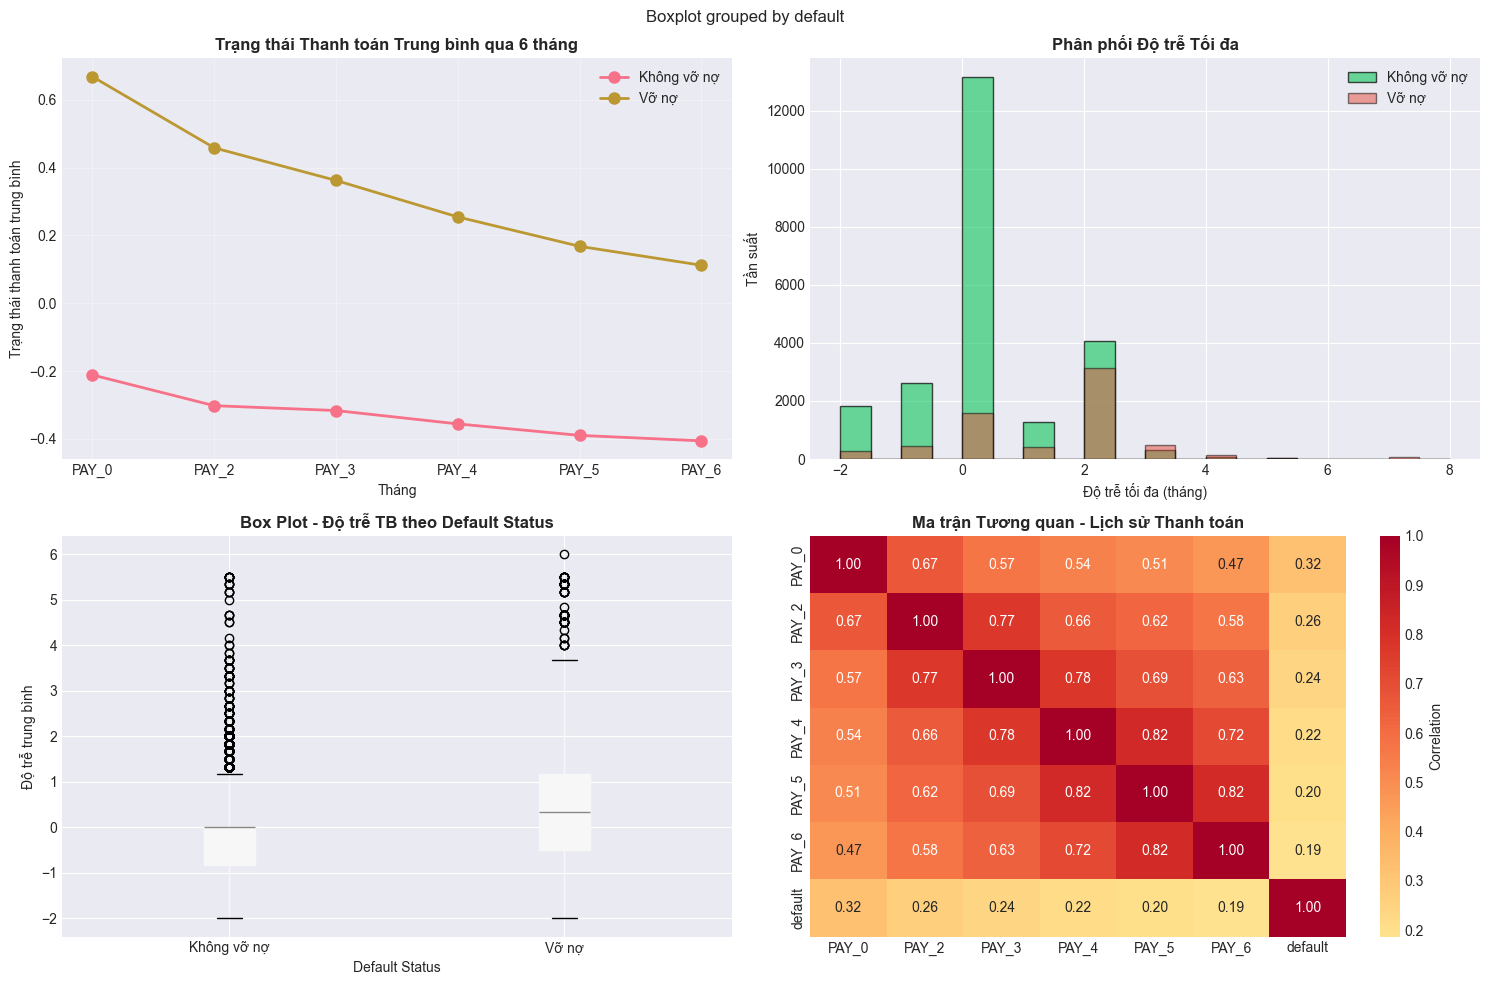

In [21]:
# Visualization - Payment History
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Payment status over time
pay_means = df.groupby('default')[pay_cols].mean()
pay_means.T.plot(ax=axes[0, 0], marker='o', linewidth=2, markersize=8)
axes[0, 0].set_title('Trạng thái Thanh toán Trung bình qua 6 tháng', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Tháng')
axes[0, 0].set_ylabel('Trạng thái thanh toán trung bình')
axes[0, 0].legend(['Không vỡ nợ', 'Vỡ nợ'])
axes[0, 0].grid(True, alpha=0.3)

# Max payment delay distribution
df[df['default'] == 0]['MAX_PAY_DELAY'].hist(bins=20, ax=axes[0, 1], 
                                              color='#2ecc71', edgecolor='black', 
                                              alpha=0.7, label='Không vỡ nợ')
df[df['default'] == 1]['MAX_PAY_DELAY'].hist(bins=20, ax=axes[0, 1], 
                                              color='#e74c3c', edgecolor='black', 
                                              alpha=0.5, label='Vỡ nợ')
axes[0, 1].set_title('Phân phối Độ trễ Tối đa', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Độ trễ tối đa (tháng)')
axes[0, 1].set_ylabel('Tần suất')
axes[0, 1].legend()

# Average payment delay by default
df.boxplot(column='AVG_PAY_DELAY', by='default', ax=axes[1, 0], patch_artist=True)
axes[1, 0].set_title('Box Plot - Độ trễ TB theo Default Status', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Default Status')
axes[1, 0].set_ylabel('Độ trễ trung bình')
axes[1, 0].set_xticklabels(['Không vỡ nợ', 'Vỡ nợ'])

# Heatmap of payment status
pay_corr = df[pay_cols + ['default']].corr()
sns.heatmap(pay_corr, annot=True, fmt='.2f', cmap='RdYlGn_r', 
           center=0, ax=axes[1, 1], cbar_kws={'label': 'Correlation'})
axes[1, 1].set_title('Ma trận Tương quan - Lịch sử Thanh toán', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/payment_history_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Phân tích Hóa đơn và Thanh toán (BILL_AMT & PAY_AMT)

In [22]:
print("=" * 50)
print("PHÂN TÍCH HÓA ĐƠN VÀ THANH TOÁN")
print("=" * 50)

# Bill amount columns
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

print("\nThống kê hóa đơn:")
print(df[bill_cols].describe())

print("\nThống kê thanh toán:")
print(df[pay_amt_cols].describe())

PHÂN TÍCH HÓA ĐƠN VÀ THANH TOÁN

Thống kê hóa đơn:
           BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count   30000.000000   30000.000000  3.000000e+04   30000.000000   
mean    51223.330900   49179.075167  4.701315e+04   43262.948967   
std     73635.860576   71173.768783  6.934939e+04   64332.856134   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3558.750000    2984.750000  2.666250e+03    2326.750000   
50%     22381.500000   21200.000000  2.008850e+04   19052.000000   
75%     67091.000000   64006.250000  6.016475e+04   54506.000000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT5      BILL_AMT6  
count   30000.000000   30000.000000  
mean    40311.400967   38871.760400  
std     60797.155770   59554.107537  
min    -81334.000000 -339603.000000  
25%      1763.000000    1256.000000  
50%     18104.500000   17071.000000  
75%     50190.500000   49198.250000  
max    927171.000000  961664.000

In [23]:
# Create utilization and payment ratio features
df['AVG_BILL_AMT'] = df[bill_cols].mean(axis=1)
df['AVG_PAY_AMT'] = df[pay_amt_cols].mean(axis=1)
df['UTILIZATION_RATE'] = (df['AVG_BILL_AMT'] / df['LIMIT_BAL'] * 100).clip(upper=100)
df['PAYMENT_RATIO'] = np.where(df['AVG_BILL_AMT'] > 0, 
                                (df['AVG_PAY_AMT'] / df['AVG_BILL_AMT'] * 100).clip(upper=200),
                                0)

print("\nTính năng mới:")
print("AVG_BILL_AMT: Số tiền hóa đơn trung bình")
print("AVG_PAY_AMT: Số tiền thanh toán trung bình")
print("UTILIZATION_RATE: Tỷ lệ sử dụng hạn mức (%)")
print("PAYMENT_RATIO: Tỷ lệ thanh toán / hóa đơn (%)")

print("\nThống kê theo Default status:")
print(df.groupby('default')[['AVG_BILL_AMT', 'AVG_PAY_AMT', 
                             'UTILIZATION_RATE', 'PAYMENT_RATIO']].mean())


Tính năng mới:
AVG_BILL_AMT: Số tiền hóa đơn trung bình
AVG_PAY_AMT: Số tiền thanh toán trung bình
UTILIZATION_RATE: Tỷ lệ sử dụng hạn mức (%)
PAYMENT_RATIO: Tỷ lệ thanh toán / hóa đơn (%)

Thống kê theo Default status:
         AVG_BILL_AMT  AVG_PAY_AMT  UTILIZATION_RATE  PAYMENT_RATIO
default                                                            
0        45404.817975  5828.236775         34.866951      37.161125
1        43470.492591  3328.215617         44.590691      25.125156


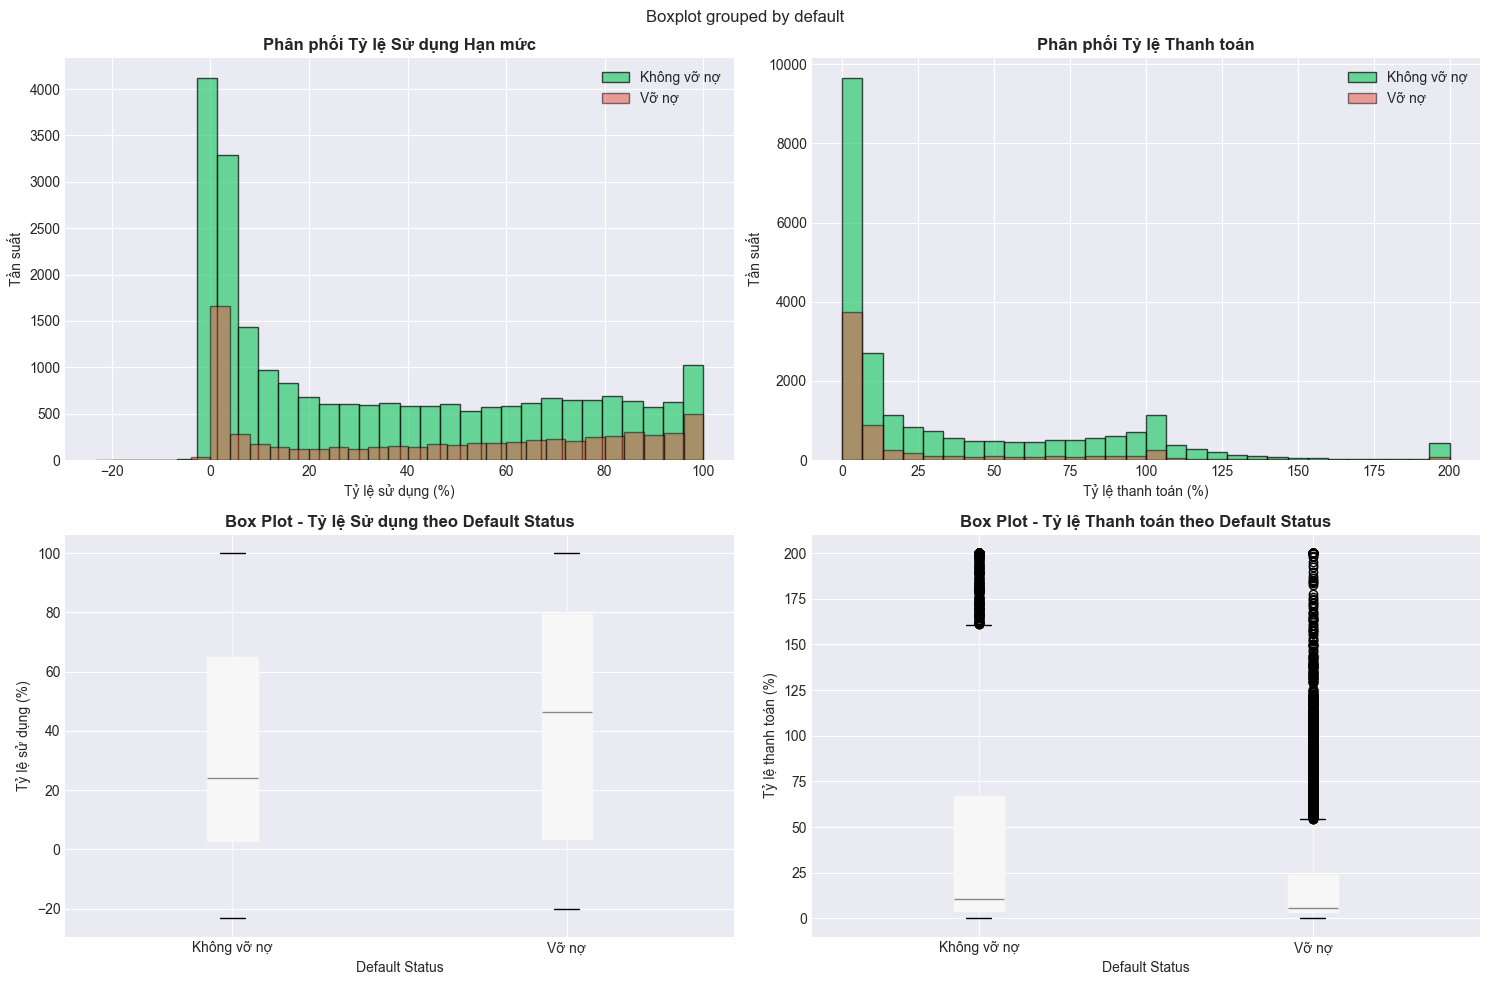

In [24]:
# Visualization - Bill and Payment
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Utilization rate distribution
df[df['default'] == 0]['UTILIZATION_RATE'].hist(bins=30, ax=axes[0, 0],
                                                 color='#2ecc71', edgecolor='black',
                                                 alpha=0.7, label='Không vỡ nợ')
df[df['default'] == 1]['UTILIZATION_RATE'].hist(bins=30, ax=axes[0, 0],
                                                 color='#e74c3c', edgecolor='black',
                                                 alpha=0.5, label='Vỡ nợ')
axes[0, 0].set_title('Phân phối Tỷ lệ Sử dụng Hạn mức', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Tỷ lệ sử dụng (%)')
axes[0, 0].set_ylabel('Tần suất')
axes[0, 0].legend()

# Payment ratio distribution
df[df['default'] == 0]['PAYMENT_RATIO'].hist(bins=30, ax=axes[0, 1],
                                              color='#2ecc71', edgecolor='black',
                                              alpha=0.7, label='Không vỡ nợ')
df[df['default'] == 1]['PAYMENT_RATIO'].hist(bins=30, ax=axes[0, 1],
                                              color='#e74c3c', edgecolor='black',
                                              alpha=0.5, label='Vỡ nợ')
axes[0, 1].set_title('Phân phối Tỷ lệ Thanh toán', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Tỷ lệ thanh toán (%)')
axes[0, 1].set_ylabel('Tần suất')
axes[0, 1].legend()

# Utilization rate by default
df.boxplot(column='UTILIZATION_RATE', by='default', ax=axes[1, 0], patch_artist=True)
axes[1, 0].set_title('Box Plot - Tỷ lệ Sử dụng theo Default Status', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Default Status')
axes[1, 0].set_ylabel('Tỷ lệ sử dụng (%)')
axes[1, 0].set_xticklabels(['Không vỡ nợ', 'Vỡ nợ'])

# Payment ratio by default
df.boxplot(column='PAYMENT_RATIO', by='default', ax=axes[1, 1], patch_artist=True)
axes[1, 1].set_title('Box Plot - Tỷ lệ Thanh toán theo Default Status', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Default Status')
axes[1, 1].set_ylabel('Tỷ lệ thanh toán (%)')
axes[1, 1].set_xticklabels(['Không vỡ nợ', 'Vỡ nợ'])

plt.tight_layout()
plt.savefig('../reports/figures/bill_payment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Phân tích Tương quan (Correlation Analysis)

In [25]:
# Select numerical features for correlation
num_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
               'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
               'MAX_PAY_DELAY', 'AVG_PAY_DELAY',
               'UTILIZATION_RATE', 'PAYMENT_RATIO', 'default']

# Correlation matrix
corr_matrix = df[num_features].corr()

# Correlation with target
target_corr = corr_matrix['default'].sort_values(ascending=False)
print("=" * 50)
print("TƯƠNG QUAN VỚI BIẾN MỤC TIÊU (DEFAULT)")
print("=" * 50)
print("\nTop 15 features có tương quan cao nhất:\n")
print(target_corr.head(15))

TƯƠNG QUAN VỚI BIẾN MỤC TIÊU (DEFAULT)

Top 15 features có tương quan cao nhất:

default             1.000000
MAX_PAY_DELAY       0.331036
PAY_0               0.324794
AVG_PAY_DELAY       0.281955
PAY_2               0.263551
PAY_3               0.235253
PAY_4               0.216614
PAY_5               0.204149
PAY_6               0.186866
UTILIZATION_RATE    0.117546
EDUCATION           0.028006
AGE                 0.013890
MARRIAGE           -0.024339
SEX                -0.039961
PAYMENT_RATIO      -0.110771
Name: default, dtype: float64


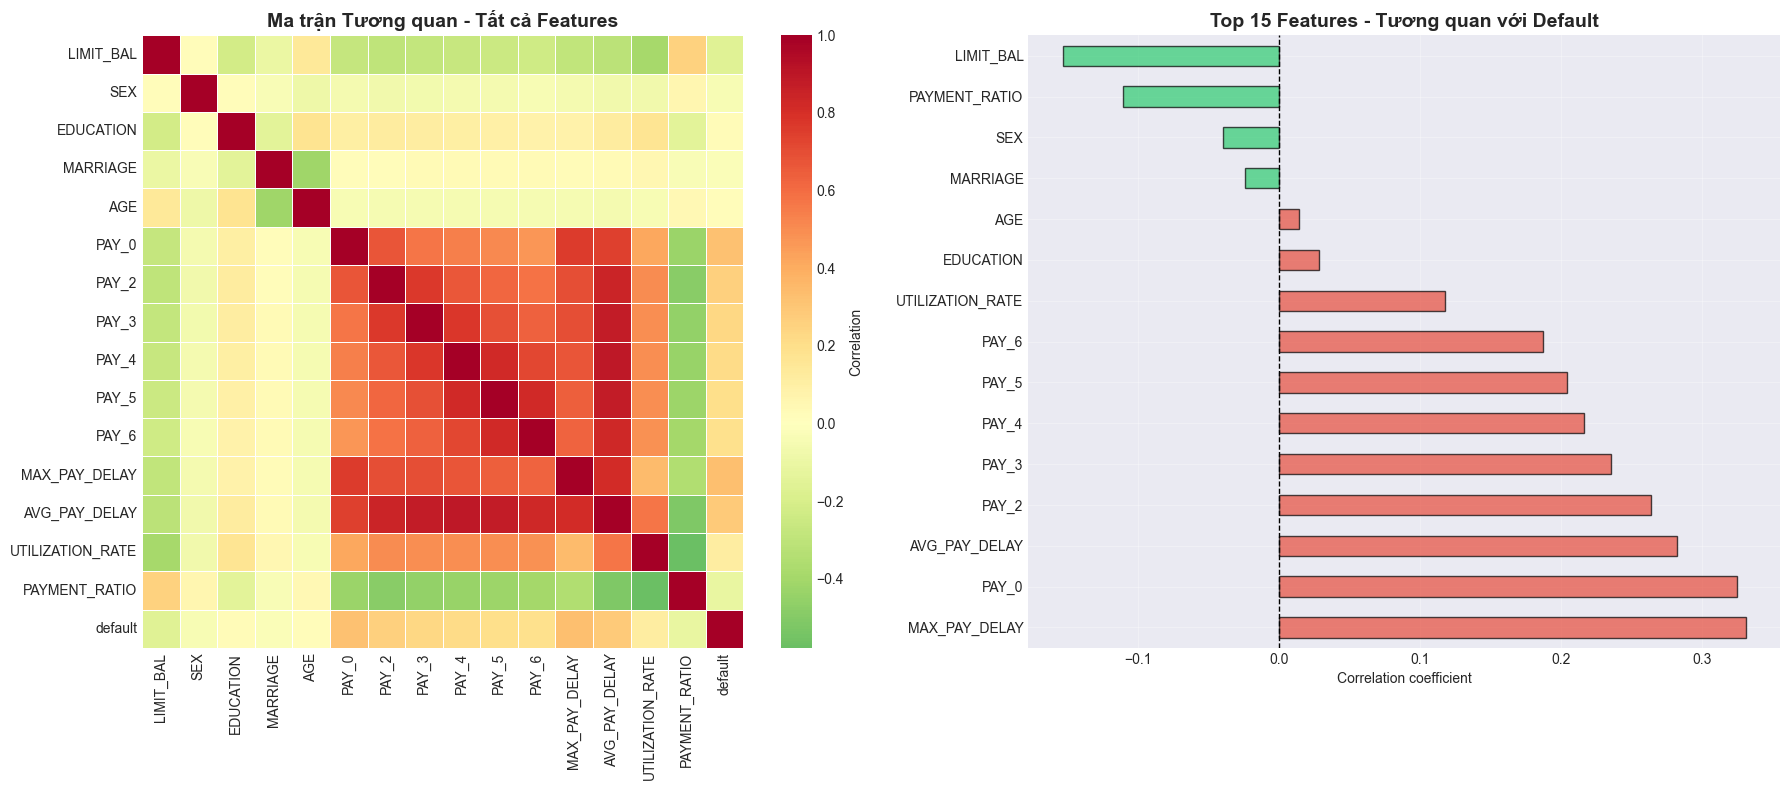

In [26]:
# Visualization - Correlation
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Full correlation heatmap
sns.heatmap(corr_matrix, cmap='RdYlGn_r', center=0, 
           linewidths=0.5, ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Ma trận Tương quan - Tất cả Features', fontsize=14, fontweight='bold')

# Correlation with target
target_corr_top = target_corr.drop('default').head(15)
colors_corr = ['#e74c3c' if x > 0 else '#2ecc71' for x in target_corr_top]
target_corr_top.plot(kind='barh', ax=axes[1], color=colors_corr, edgecolor='black', alpha=0.7)
axes[1].set_title('Top 15 Features - Tương quan với Default', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Correlation coefficient')
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 10. Tổng kết EDA

### Insights chính:

1. **Imbalanced Dataset**: 
   - Tỷ lệ vỡ nợ ~22%, không vỡ nợ ~78%
   - Cần xử lý imbalance khi training model

2. **Lịch sử thanh toán** là yếu tố quan trọng nhất:
   - PAY_0, PAY_2, PAY_3 có tương quan mạnh với default
   - Khách hàng trễ hạn thường xuyên có rủi ro cao

3. **Hạn mức tín dụng**:
   - Khách hàng không vỡ nợ có hạn mức cao hơn
   - Tỷ lệ sử dụng hạn mức cao = rủi ro cao

4. **Nhân khẩu học**:
   - Tuổi: Khách hàng trẻ (20-30) có tỷ lệ vỡ nợ cao hơn
   - Giới tính: Có sự khác biệt nhỏ
   - Học vấn: Trình độ cao hơn = rủi ro thấp hơn

5. **Hành vi thanh toán**:
   - Payment Ratio thấp = rủi ro cao
   - Xu hướng thanh toán giảm dần qua các tháng

### Bước tiếp theo:
1. Data Preprocessing & Feature Engineering
2. Handle imbalanced data (SMOTE, undersampling)
3. Feature selection
4. Model training và evaluation

In [27]:
# Save processed data for next steps
df.to_csv('../data/processed/data_after_eda.csv', index=False)
print("✅ Đã lưu dữ liệu sau EDA vào: ../data/processed/data_after_eda.csv")

✅ Đã lưu dữ liệu sau EDA vào: ../data/processed/data_after_eda.csv


In [28]:
print("\n" + "="*60)
print("✅ HOÀN THÀNH EDA")
print("="*60)
print("\nĐã tạo các insights quan trọng và lưu visualizations.")
print("Tiếp theo: Notebook 02 - Data Preprocessing & Feature Engineering")


✅ HOÀN THÀNH EDA

Đã tạo các insights quan trọng và lưu visualizations.
Tiếp theo: Notebook 02 - Data Preprocessing & Feature Engineering
